# **Employee Salary Prediction Using Catboost**

In [1]:
import pandas as pd

In [2]:
# Load your dataset
data = pd.read_csv("/content/adult 3.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Replace ? with NaN for easy handling
data.replace("?", pd.NA, inplace=True)

In [5]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
data.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [10]:
data.shape

(48842, 15)

In [11]:
# Value counts for categorical features
for col in data.select_dtypes(include="object"):
    print(f"\n{col}:\n", data[col].value_counts())


workclass:
 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education:
 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status:
 marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation:
 occupation
Prof-specialty       6172
Craft-repair   

In [12]:
# Replace NA with 'Others' for categorical columns
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna("Others")

In [13]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
# Outlier filter (age, hours-per-week, capital-gain/loss)
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
data = data[data['hours-per-week'] <= 80]

In [15]:
data.shape

(48153, 15)

# **Feature Engineering**

In [16]:
#Capital Gain - Loss Feature
data['capital_diff'] = data['capital-gain'] - data['capital-loss']


In [17]:
#Age Group Binning
data['age_group'] = pd.cut(
    data['age'],
    bins=[17, 25, 35, 45, 55, 65, 75],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
)


In [18]:
#Hours-per-Week Category
data['hours_category'] = pd.cut(
    data['hours-per-week'],
    bins=[0, 25, 40, 60, 100],
    labels=['part-time', 'full-time', 'overtime', 'extreme']
)


In [19]:
education_map = {
    'Preschool': 'Dropout',
    '1st-4th': 'Dropout',
    '5th-6th': 'Dropout',
    '7th-8th': 'Dropout',
    '9th': 'Dropout',
    '10th': 'HighSchool',
    '11th': 'HighSchool',
    '12th': 'HighSchool',
    'HS-grad': 'HS-grad',
    'Some-college': 'Undergrad',
    'Assoc-acdm': 'Diploma',
    'Assoc-voc': 'Diploma',
    'Bachelors': 'Bachelors',
    'Masters': 'Masters',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Professional'
}
data['edu_level'] = data['education'].map(education_map)



In [20]:
# Marriage + Relationship Combined Flag
data['is_family_person'] = data.apply(
    lambda row: 1 if (row['marital-status'] in ['Married-civ-spouse', 'Married-spouse-absent']) and
                        (row['relationship'] in ['Husband', 'Wife']) else 0, axis=1
)


In [21]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'capital_diff', 'age_group', 'hours_category', 'edu_level',
       'is_family_person'],
      dtype='object')

In [22]:
# Drop redundant features
data.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)
# data.drop(['education'], axis=1, inplace=True)


In [23]:
data.drop('fnlwgt', axis=1, inplace=True)


In [24]:
data.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'capital_diff', 'age_group',
       'hours_category', 'edu_level', 'is_family_person'],
      dtype='object')

In [25]:
data.nunique().sort_values()


,0
income,2
gender,2
is_family_person,2
hours_category,4
race,5
age_group,6
relationship,6
marital-status,7
edu_level,9
workclass,9


**Catboost**

In [26]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, accuracy_score


In [28]:
# Define features and target
X = data.drop('income', axis=1)
y = data['income']

In [29]:
# Auto detect categorical columns
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_features)


['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'age_group', 'hours_category', 'edu_level']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
for col in cat_features:
    X_train[col] = X_train[col].astype(str).fillna("missing")
    X_test[col] = X_test[col].astype(str).fillna("missing")


In [32]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)

# Train the model with categorical feature info
catboost_model.fit(X_train, y_train,
          cat_features=cat_features,
          eval_set=(X_test, y_test),
          use_best_model=True)


0:	learn: 0.8471782	test: 0.8454989	best: 0.8454989 (0)	total: 175ms	remaining: 2m 55s
100:	learn: 0.8681273	test: 0.8673035	best: 0.8674073 (98)	total: 17.4s	remaining: 2m 34s
200:	learn: 0.8745652	test: 0.8715606	best: 0.8715606 (197)	total: 36s	remaining: 2m 22s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8730142249
bestIteration = 242

Shrink model to first 243 iterations.


In [33]:
#  Evaluate
y_pred = catboost_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8730142248987645


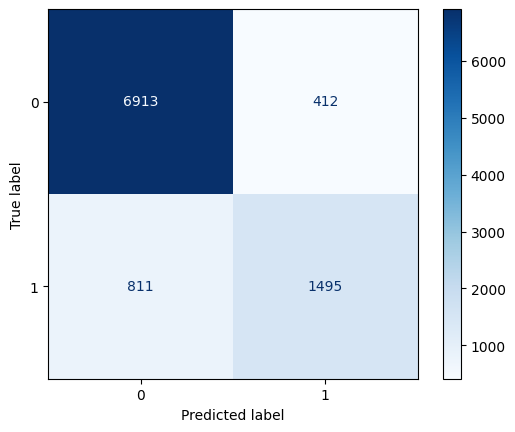

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = catboost_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7325
        >50K       0.78      0.65      0.71      2306

    accuracy                           0.87      9631
   macro avg       0.84      0.80      0.81      9631
weighted avg       0.87      0.87      0.87      9631



In [36]:
from catboost import CatBoostClassifier

# After training
catboost_model.save_model("catboost_model.cbm")


**Comapre Models**

In [37]:
data1 = pd.read_csv("/content/adult 3.csv")

In [38]:
data1.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6093
Craft-repair         6070
Exec-managerial      5994
Adm-clerical         5576
Sales                5445
Other-service        4862
Machine-op-inspct    3008
Others               2692
Transport-moving     2306
Handlers-cleaners    2062
Tech-support         1439
Farming-fishing      1401
Protective-serv       961
Priv-house-serv       229
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-38-495877598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1.occupation.replace({'?':'Others'},inplace=True)


In [39]:
data1=data1[data1['workclass']!='Without-pay']
data1=data1[data1['workclass']!='Never-worked']
print(data1['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


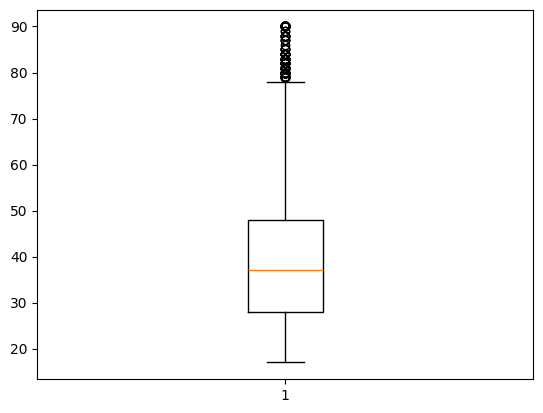

In [40]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data1['age'])
plt.show()

In [41]:
data=data[(data['age']<=75)&(data['age']>=17)]
data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital_diff,age_group,hours_category,edu_level,is_family_person
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0,18-25,full-time,HighSchool,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0,36-45,overtime,HS-grad,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,0,26-35,full-time,Diploma,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,7688,36-45,full-time,Undergrad,1
4,18,Others,Some-college,10,Never-married,Others,Own-child,White,Female,30,United-States,<=50K,0,18-25,full-time,Undergrad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0,26-35,full-time,Diploma,1
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0,36-45,full-time,HS-grad,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0,56-65,full-time,HS-grad,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0,18-25,part-time,HS-grad,0


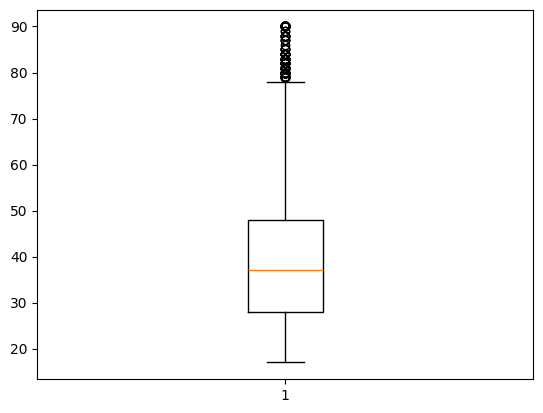

In [42]:
plt.boxplot(data1['age'])
plt.show()

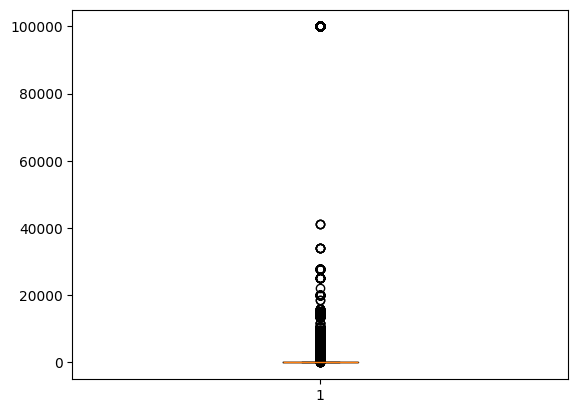

In [43]:
plt.boxplot(data1['capital-gain'])
plt.show()

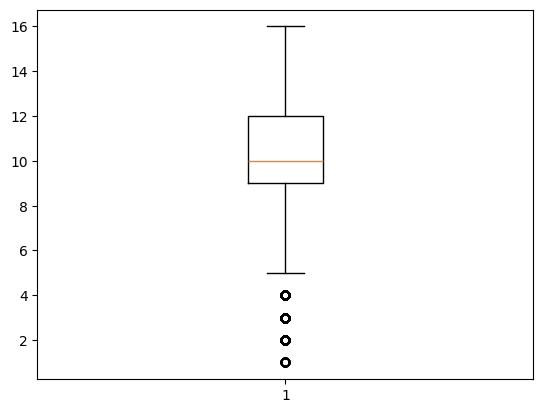

In [44]:
plt.boxplot(data1['educational-num'])
plt.show()

In [45]:
data1=data1[(data1['educational-num']<=16)&(data1['educational-num']>=5)]

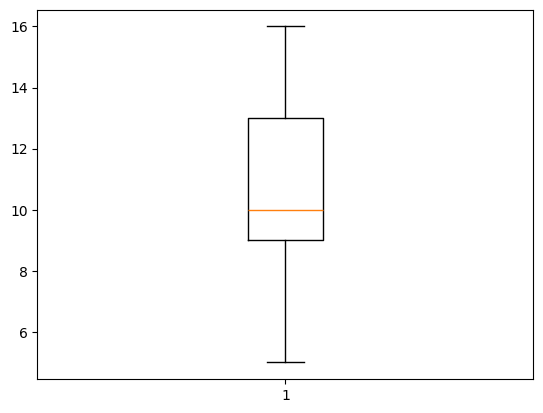

In [46]:
plt.boxplot(data1['educational-num'])
plt.show()

In [47]:
data1.shape

(47020, 15)

In [48]:
data1=data1.drop(columns=['education']) #redundant features removal

In [49]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data1['workclass']=encoder.fit_transform(data1['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data1['marital-status']=encoder.fit_transform(data1['marital-status'])   #3 categories 0, 1, 2
data1['occupation']=encoder.fit_transform(data1['occupation'])
data1['relationship']=encoder.fit_transform(data1['relationship'])      #5 categories  0, 1, 2, 3, 4
data1['race']=encoder.fit_transform(data1['race'])
data1['gender']=encoder.fit_transform(data1['gender'])    #2 catogories     0, 1
data1['native-country']=encoder.fit_transform(data1['native-country'])

In [50]:
data1

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,2,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,0,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [51]:
x=data1.drop(columns=['income'])
y=data1['income']

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8191
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7007
        >50K       0.73      0.46      0.56      2397

    accuracy                           0.82      9404
   macro avg       0.78      0.70      0.73      9404
weighted avg       0.81      0.82      0.80      9404

RandomForest Accuracy: 0.8526
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7007
        >50K       0.75      0.62      0.68      2397

    accuracy                           0.85      9404
   macro avg       0.82      0.78      0.79      9404
weighted avg       0.85      0.85      0.85      9404

KNN Accuracy: 0.8208
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      7007
        >50K       0.67      0.58      0.62      2397

    accuracy                           0.82      9404
   macro avg       0.77      0.74      0.

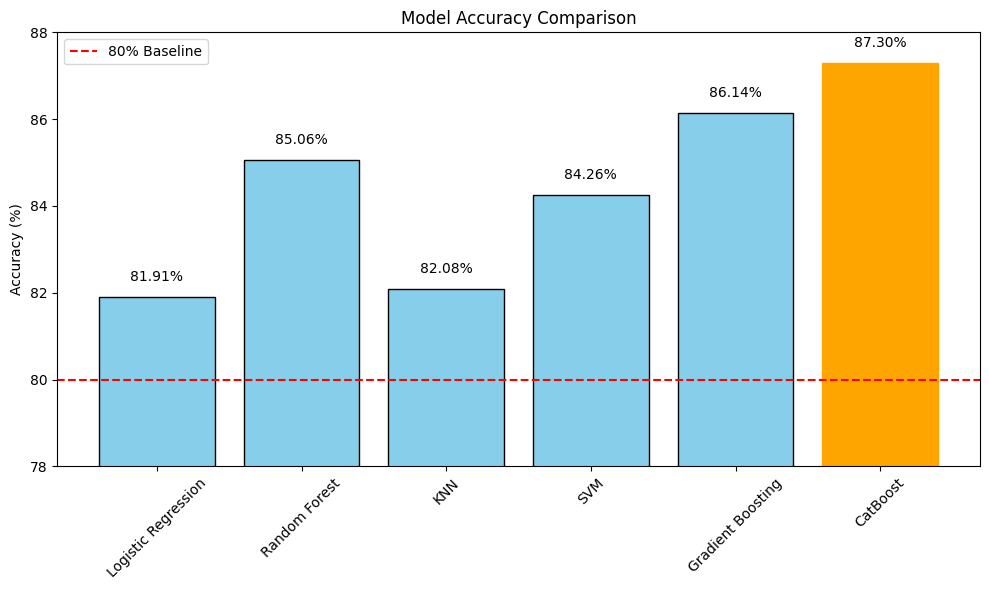

In [53]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
model_names = [
    'Logistic Regression',
    'Random Forest',
    'KNN',
    'SVM',
    'Gradient Boosting',
    'CatBoost'
]
accuracies = [
    0.8191,
    0.8506,
    0.8208,
    0.8426,
    0.8614,
    0.8730
]

# Convert accuracies to percentages for display
accuracies_percent = [acc * 100 for acc in accuracies]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies_percent, color='skyblue', edgecolor='black')

# Highlight best model
bars[-1].set_color('orange')  # CatBoost

# Plot horizontal line at 80%
plt.axhline(y=80, color='red', linestyle='--', label='80% Baseline')

# Add accuracy labels on top of bars
for bar, acc in zip(bars, accuracies_percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=10)

# Final plot formatting
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(78, 88)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


CatBoost shows higher accuracy because it handles categorical features natively without one-hot encoding, preserving useful information.
It also uses ordered boosting, which reduces overfitting and improves generalization on small to medium datasets.

In [54]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [55]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model('/content/catboost_model.cbm')  # Your saved path

print("Number of features learned:", len(model.feature_names_))
print("Feature names used in training:", model.feature_names_)


Number of features learned: 16
Feature names used in training: ['age', 'workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week', 'native-country', 'capital_diff', 'age_group', 'hours_category', 'edu_level', 'is_family_person']


In [56]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier

# Load model
model = CatBoostClassifier()
model.load_model("/content/catboost_model.cbm")

st.title("Income Prediction App (CatBoost)")

with st.form("income_form"):
    age = st.slider("Age", 18, 90, 30)
    workclass = st.selectbox("Workclass", ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov',
                                           'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'])
    education = st.selectbox("Education", ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
                                           '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm',
                                           'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school'])
    educational_num = st.slider("Educational Number", 1, 16, 10)
    marital_status = st.selectbox("Marital Status", ['Never-married', 'Married-civ-spouse', 'Divorced',
                                                     'Separated', 'Widowed', 'Married-spouse-absent'])
    occupation = st.selectbox("Occupation", ['Tech-support', 'Craft-repair', 'Other-service', 'Sales',
                                             'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners',
                                             'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing',
                                             'Transport-moving', 'Priv-house-serv', 'Protective-serv',
                                             'Armed-Forces'])
    relationship = st.selectbox("Relationship", ['Wife', 'Own-child', 'Husband', 'Not-in-family',
                                                 'Other-relative', 'Unmarried'])
    race = st.selectbox("Race", ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
    gender = st.radio("Gender", ['Male', 'Female'])
    hours_per_week = st.slider("Hours per week", 1, 100, 40)
    native_country = st.selectbox("Native Country", ['United-States', 'India', 'Mexico', 'Philippines', 'Germany', 'Other'])

    capital_gain = st.number_input("Capital Gain", min_value=0, value=0)
    capital_loss = st.number_input("Capital Loss", min_value=0, value=0)

    submit = st.form_submit_button("Predict Income")

if submit:
    # Derived fields
    capital_diff = capital_gain - capital_loss

    # age_group
    if age < 25:
        age_group = 'Young'
    elif age < 45:
        age_group = 'Adult'
    else:
        age_group = 'Senior'

    # hours_category
    if hours_per_week < 20:
        hours_category = 'Low'
    elif hours_per_week < 40:
        hours_category = 'Medium'
    else:
        hours_category = 'High'

    # edu_level
    education_map = {
        'Preschool': 'Dropout', '1st-4th': 'Dropout', '5th-6th': 'Dropout',
        '7th-8th': 'Dropout', '9th': 'Dropout', '10th': 'HighSchool', '11th': 'HighSchool',
        '12th': 'HighSchool', 'HS-grad': 'HS-grad', 'Some-college': 'Undergrad',
        'Assoc-acdm': 'Diploma', 'Assoc-voc': 'Diploma', 'Bachelors': 'Bachelors',
        'Masters': 'Masters', 'Doctorate': 'Doctorate', 'Prof-school': 'Professional'
    }
    edu_level = education_map.get(education, 'Other')

    # is_family_person
    is_family_person = 1 if (marital_status in ['Married-civ-spouse', 'Married-spouse-absent']) and \
                            (relationship in ['Husband', 'Wife']) else 0

    # Final input dict
    input_dict = {
        'age': age,
        'workclass': workclass,
        'education': education,
        'educational-num': educational_num,
        'marital-status': marital_status,
        'occupation': occupation,
        'relationship': relationship,
        'race': race,
        'gender': gender,
        'hours-per-week': hours_per_week,
        'native-country': native_country,
        'capital_diff': capital_diff,
        'age_group': age_group,
        'hours_category': hours_category,
        'edu_level': edu_level,
        'is_family_person': is_family_person
    }

    input_df = pd.DataFrame([input_dict])

    # Predict
    prediction = model.predict(input_df)[0]
    st.success(f"Predicted Income Category: {'>50K' if prediction == 1 else '<=50K'}")


Writing app.py


In [57]:
!pip install streamlit catboost

In [58]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.237.80:8501

  Stopping...
